In [1]:
import torch

In [2]:
device = torch.device("cpu")

In [3]:
N, D_in, H, D_out = 64, 1000, 100, 10

In [4]:
x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

In [5]:
w1 = torch.randn(D_in, H, device=device)
w2 = torch.randn(H, D_out, device=device)

In [6]:
learning_rate = 1e-6
for t in range(500):
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    
    loss = (y_pred-y).pow(2).sum()
    print(t, loss.item())
    
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h<0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 29910814.0
1 23893842.0
2 22404334.0
3 21835986.0
4 20115498.0
5 16722482.0
6 12293245.0
7 8210660.0
8 5163933.0
9 3219179.5
10 2061704.25
11 1393138.75
12 999360.75
13 758021.5
14 601042.4375
15 492458.71875
16 412783.375
17 351456.96875
18 302521.59375
19 262446.59375
20 229032.96875
21 200814.40625
22 176751.71875
23 156113.5625
24 138281.546875
25 122805.484375
26 109316.359375
27 97534.0625
28 87198.96875
29 78109.7734375
30 70105.234375
31 63034.08203125
32 56769.89453125
33 51215.71875
34 46279.02734375
35 41885.390625
36 37958.86328125
37 34445.55078125
38 31295.978515625
39 28469.330078125
40 25927.4140625
41 23637.873046875
42 21574.28515625
43 19710.9140625
44 18029.318359375
45 16507.37890625
46 15126.220703125
47 13871.923828125
48 12732.119140625
49 11696.0390625
50 10752.392578125
51 9891.181640625
52 9105.2490234375
53 8387.6103515625
54 7731.25
55 7130.75537109375
56 6580.9814453125
57 6077.23876953125
58 5614.822265625
59 5190.50830078125
60 4801.1669921875
61 4443.

In [8]:
w1 = torch.randn(D_in, H, device=device, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, requires_grad=True)

In [9]:
learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    
    loss = (y_pred-y).pow(2).sum()
    print(t, loss.item())
    
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        
        w1.grad.zero_()
        w2.grad.zero_()

0 31473400.0
1 28076702.0
2 26214734.0
3 22544860.0
4 17190474.0
5 11411215.0
6 6985721.0
7 4136619.25
8 2533643.0
9 1652180.0
10 1163077.625
11 875050.5
12 692673.1875
13 567755.5
14 476509.15625
15 406294.96875
16 350219.5
17 304259.375
18 266058.875
19 233913.984375
20 206583.171875
21 183205.609375
22 163094.3125
23 145672.484375
24 130539.1015625
25 117310.7265625
26 105700.53125
27 95499.2890625
28 86482.234375
29 78480.3828125
30 71362.703125
31 65019.66796875
32 59346.16796875
33 54255.32421875
34 49683.8984375
35 45564.1953125
36 41843.89453125
37 38480.1875
38 35430.12109375
39 32659.74609375
40 30139.953125
41 27841.26171875
42 25742.603515625
43 23824.306640625
44 22068.455078125
45 20459.5390625
46 18982.9296875
47 17626.3828125
48 16379.625
49 15231.74609375
50 14173.9638671875
51 13198.2900390625
52 12297.2919921875
53 11465.1484375
54 10695.2490234375
55 9982.4833984375
56 9322.4248046875
57 8711.015625
58 8143.650390625
59 7616.9140625
60 7127.36474609375
61 6672.05615

483 6.9168207119219e-05
484 6.803775613661855e-05
485 6.686111009912565e-05
486 6.627045513596386e-05
487 6.520901661133394e-05
488 6.421709986170754e-05
489 6.339888204820454e-05
490 6.21547078480944e-05
491 6.124653009464964e-05
492 6.0210804804228246e-05
493 5.931175473961048e-05
494 5.84346053074114e-05
495 5.757404142059386e-05
496 5.688377495971508e-05
497 5.6023163779173046e-05
498 5.5170050472952425e-05
499 5.453064295579679e-05


In [11]:
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [14]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())

In [15]:
x, y = Variable(x), Variable(y)

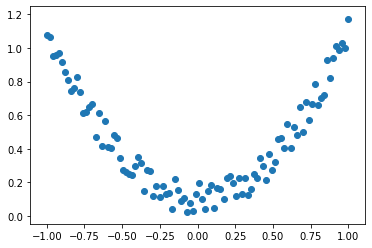

In [16]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [26]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


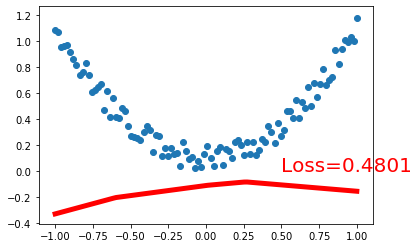

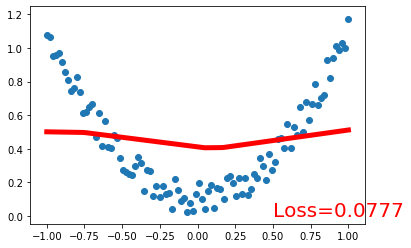

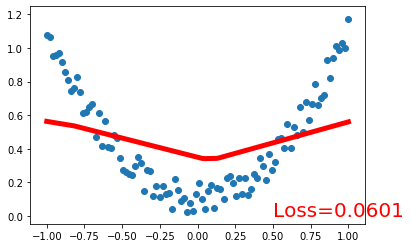

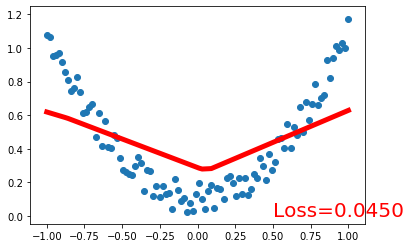

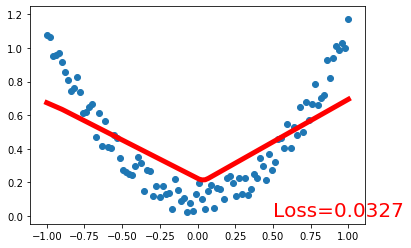

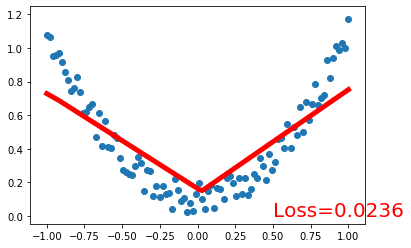

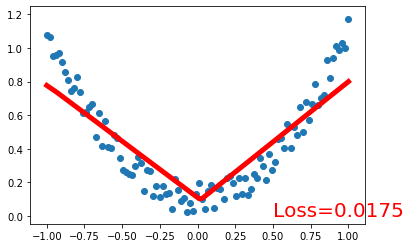

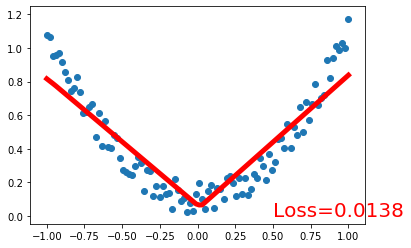

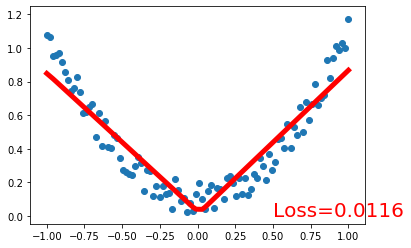

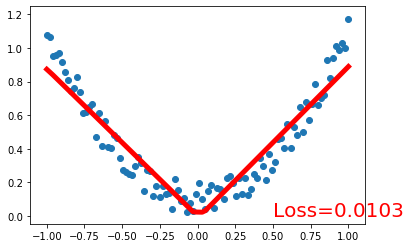

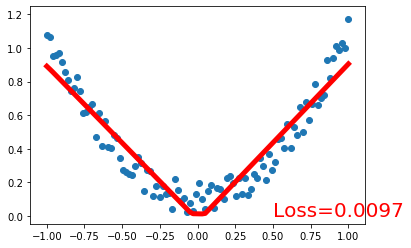

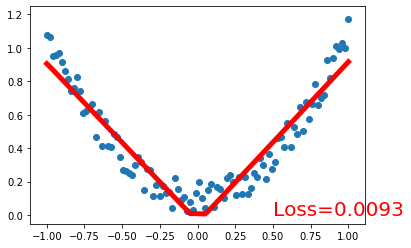

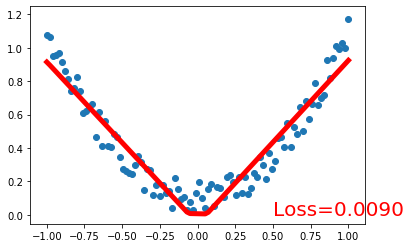

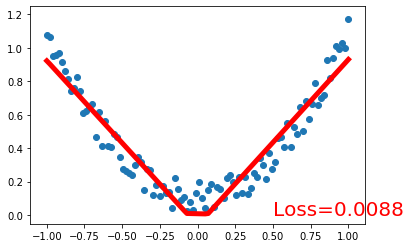

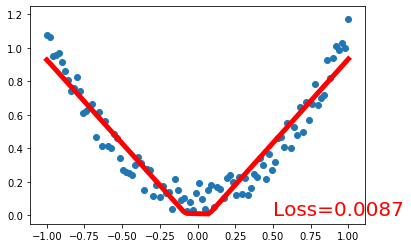

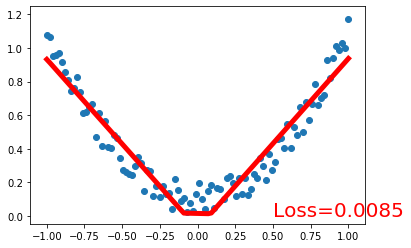

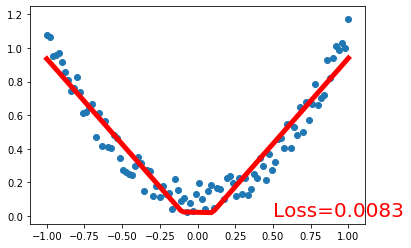

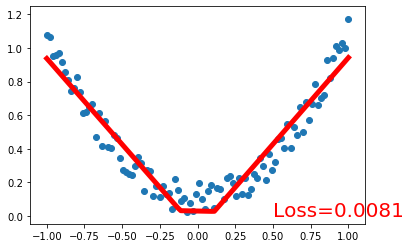

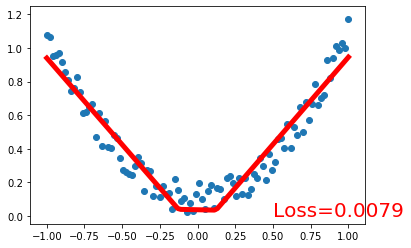

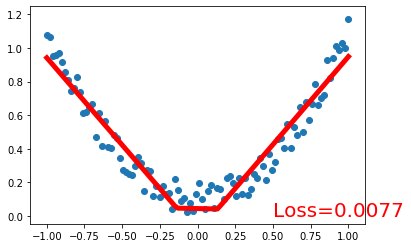

In [40]:
net = Net(1, 10, 1)
print(net)

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

plt.ion()
plt.show()

for t in range(100):
    prediction = net(x)
    
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 5 == 0:
        
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), "r-", lw=5)
        plt.text(0.5, 0, "Loss=%.4f" % loss.data.numpy(), fontdict={"size": 20, "color": "red"})
        plt.pause(0.1)

plt.ioff()
plt.show()
    
    